This code will display
- the gold image
- the 10 candidate images
- the 10 closest results from a search engine

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import time
import random
import os
import csv

In [14]:
mycwd = os.path.dirname(os.getcwd())
#os.chdir("..")
#do stuff in parent directory
#print(os.chdir(mycwd)  )

In [3]:
os.getcwd()

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\11-Insaf_display_gold_search'

In [4]:
os.path.dirname(os.getcwd())

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1'

In [15]:
language = "english"
search_engine = "bing"
root_search = os.path.join(os.getcwd(), "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query")
root_search

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\11-Insaf_display_gold_search\\9-Insaf_scrapSearch\\scrape_english\\bing\\query'

In [16]:
os.path.dirname(os.getcwd())

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1'

In [174]:
# flags
language = "english"
#language = "persian"
#language = "italian"
search_engine = "bing"
search_engines = ["bing", "qwant", "ecosia"]
#search_engines = ["qwant", "ecosia"]

# folders
folder_images = os.path.join(mycwd, "0-dataset", "test_images")
root_txt =  os.path.join(mycwd, "0-dataset", "test.data.v1.1.gold")
folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query")

if language == "english":
    file_gold = os.path.join(root_txt,"en.test.gold.v1.1.txt")
    file_data = os.path.join(root_txt,"en.test.data.v1.1.txt")
elif language == "persian":
    file_gold = os.path.join(root_txt,"fa.test.gold.txt")
    file_data = os.path.join(root_txt,"fa.test.data.txt")
elif language == "italian":
    file_gold = os.path.join(root_txt,"it.test.gold.v1.1.txt")
    file_data = os.path.join(root_txt,"it.test.data.v1.1.txt") 
    

- first display the gold image
- then display the 10 candidate images
- then dispaly 10 images returned by the search engine

In [175]:
df_data = pd.read_csv(file_data, delimiter='\t', header=None)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,goal,football goal,image.4418.jpg,image.4416.jpg,image.4417.jpg,image.4413.jpg,image.4412.jpg,image.4415.jpg,image.4419.jpg,image.4414.jpg,image.2166.jpg,image.1150.jpg
1,mustard,mustard seed,image.4429.png,image.4422.jpg,image.4423.jpg,image.4424.jpg,image.4421.jpg,image.4427.jpg,image.4426.jpg,image.4420.jpg,image.4425.jpg,image.4428.jpg
2,seat,eating seat,image.4435.jpg,image.4436.jpg,image.1166.jpg,image.4430.jpg,image.4433.jpg,image.4432.jpg,image.4438.jpg,image.4434.jpg,image.4431.jpg,image.4437.jpg
3,navigate,navigate the web,image.4439.jpg,image.4440.jpg,image.4441.jpg,image.4442.jpg,image.4444.jpg,image.4445.jpg,image.1435.jpg,image.4446.png,image.1434.jpg,image.4443.jpg
4,butterball,butterball person,image.4454.jpg,image.4450.jpg,image.4455.jpg,image.4453.jpg,image.4448.jpg,image.1253.jpg,image.4451.jpg,image.4452.jpg,image.4447.jpg,image.4449.jpg


In [176]:
df_gold = pd.read_csv(file_gold, delimiter='\t', header=None)
df_gold.head()

,0
0,image.2166.jpg
1,image.4429.png
2,image.4432.jpg
3,image.1435.jpg
4,image.4455.jpg


In [177]:
# define a function for concatenating
# images of different sizes in
# vertical and horizontal tiles
def concat_tile_resize(list_2d, 
                       interpolation = cv2.INTER_CUBIC):
      # function calling for every 
    # list of images
    img_list_v = [hconcat_resize(list_h, 
                                 interpolation = cv2.INTER_CUBIC) 
                  for list_h in list_2d]
      
    # return final image
    return vconcat_resize(img_list_v, interpolation=cv2.INTER_CUBIC)
def hconcat_resize(img_list, 
                   interpolation 
                   = cv2.INTER_CUBIC):
      # take minimum hights
    h_min = min(img.shape[0] 
                for img in img_list)
      
    # image resizing 
    im_list_resize = [cv2.resize(img,
                       (int(img.shape[1] * h_min / img.shape[0]),
                        h_min), interpolation
                                 = interpolation) 
                      for img in img_list]
      
    # return final image
    return cv2.hconcat(im_list_resize)

# define a function for vertically 
# concatenating images of different
# widths 
def vconcat_resize(img_list, interpolation 
                   = cv2.INTER_CUBIC):
      # take minimum width
    w_min = min(img.shape[1] 
                for img in img_list)
      
    # resizing images
    im_list_resize = [cv2.resize(img,
                      (w_min, int(img.shape[0] * w_min / img.shape[1])),
                                 interpolation = interpolation)
                      for img in img_list]
    # return final image
    return cv2.vconcat(im_list_resize)

In [220]:
images[23]

C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4476.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4482.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4479.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4480.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4477.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4483.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4478.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4485.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image.4481.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\0-dataset\test_images\image

TypeError: Image data cannot be converted to float

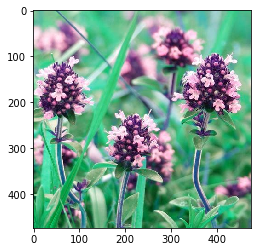

In [214]:
for i in range(len(images)):
    print(images_names[i])
    plt.imshow(images[i])

In [233]:
from PIL import Image
img = Image.open(images_names[23])

In [239]:
img = cv2.imread(images_names[23])

In [240]:
img

In [236]:
images_names[22]

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\9-Insaf_scrapSearch\\scrape_english\\qwant\\query\\7\\qwant_2.jpg'

TypeError: Image data cannot be converted to float

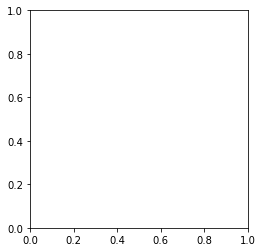

In [234]:
plt.imshow(img)

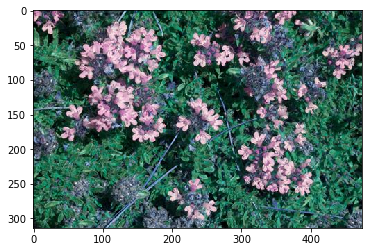

In [202]:
for i in range(len(images)):
    plt.imshow(images[39])

In [182]:
max_images

10

In [205]:
print(0,10,10,10+jump,10+jump,10+2*jump,10+2*jump,len(images))

0 10 10 20 20 30 30 40


In [213]:
start=time.time()
max_images = 10
plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.ion() 
dest_folder = os.path.join("result" , language)
if not os.path.isdir(dest_folder):
       os.makedirs(dest_folder)
empty_folders=[]
for i in range (df_gold.shape[0]):
#for i in range (3):
    print("treating image : ", str(i), " context ", df_data.iloc[i][1])
    images = []
    images_names = []
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    # get the gold image
    img = cv2.imread(image_path)
    images.append(img)
    images_names.append(image_path)
    # get the candidate images
    for k in range(2,df_data.shape[1]):        
        if (df_data.iloc[i][k]!= df_gold.iloc[i][0]):   
            image_path = os.path.join(folder_images, df_data.iloc[i][k])
            # get the gold image
            img = cv2.imread(image_path)
            images.append(img)
            images_names.append(image_path)
    for search_engine in search_engines:
        
        folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query")
        if not os.listdir(os.path.join(folder_search, str(i))):
            empty_folders.append(os.path.join(folder_search, str(i)))
        else:
            for k in range(max_images):
                if search_engine == "ecosia":
                    image_path = os.path.join(folder_search, str(i), "g_"+str(k)+".jpg")
                else:
                    image_path = os.path.join(folder_search, str(i), search_engine+"_"+str(k)+".jpg")
                #print(image_path)
                # get the gold image
                img = cv2.imread(image_path)
                print(image_path)
                images.append(img)
                images_names.append(image_path)
    jump = int((len(images)-10 )/3)
    im_tile_resize = concat_tile_resize([images[0:10],images[10:10+jump],images[10+jump:10+2*jump]
                                         ,images[10+2*jump:len(images)]])
    image_name=str(i)+".png"
    cv2.imwrite(os.path.join(dest_folder, image_name), im_tile_resize)
   
    #break
  
end=time.time()
elapsed= end-start
print("elapsed time is ", elapsed)

treating image :  0  context  football goal
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_0.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_1.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_2.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_3.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_4.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_5.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\0\bing_6.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_engl

treating image :  3  context  navigate the web
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_0.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_1.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_2.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_3.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_4.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_5.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\3\bing_6.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_e

treating image :  6  context  ear tympanum
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_0.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_1.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_2.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_3.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_4.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_5.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_english\bing\query\6\bing_6.jpg
C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\9-Insaf_scrapSearch\scrape_engli

AttributeError: 'NoneType' object has no attribute 'shape'

<Figure size 1800x1800 with 0 Axes>

In [191]:
start=time.time()
max_images = 20
plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.ion() 
dest_folder = os.path.join("result" , language)
if not os.path.isdir(dest_folder):
       os.makedirs(dest_folder)
empty_folders=[]
for i in range (df_gold.shape[0]):
#for i in range (3):
    #print("treating image : ", str(i), " context ", df_data.iloc[i][1])
    images = []
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    for search_engine in search_engines:
        folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query")
        if not os.listdir(os.path.join(folder_search, str(i))):
            empty_folders.append(search_engine+ str(i))
empty_folders

['bing5',
 'bing8',
 'bing25',
 'bing42',
 'bing77',
 'bing110',
 'ecosia110',
 'bing125',
 'bing132',
 'bing179',
 'bing187',
 'bing224',
 'bing235',
 'bing241',
 'bing248',
 'bing262',
 'bing279',
 'qwant292',
 'qwant302',
 'bing307',
 'bing312',
 'bing334',
 'bing367',
 'bing416',
 'bing419',
 'bing456']

<Figure size 1800x1800 with 0 Axes>

In [184]:
[images[0:10],images[10:10+max_images],images[10+max_images:2*max_images]
                                         ,images[2*max_images:len(images)]]

[[array([[[ 23,  28,  26],
          [ 28,  33,  31],
          [ 30,  33,  31],
          ...,
          [ 29,  42,  34],
          [ 29,  48,  39],
          [ 40,  61,  52]],
  
         [[ 26,  31,  29],
          [ 31,  36,  34],
          [ 33,  36,  34],
          ...,
          [ 51,  62,  52],
          [ 43,  60,  51],
          [ 41,  61,  49]],
  
         [[ 35,  38,  36],
          [ 38,  41,  39],
          [ 36,  39,  37],
          ...,
          [106, 116, 104],
          [ 96, 110,  99],
          [ 93, 110,  97]],
  
         ...,
  
         [[ 55, 101,  58],
          [ 56, 102,  59],
          [ 47,  92,  49],
          ...,
          [ 35,  92,  47],
          [ 37,  92,  47],
          [ 36,  93,  48]],
  
         [[ 53,  99,  56],
          [ 58, 104,  61],
          [ 53,  98,  55],
          ...,
          [ 38,  98,  50],
          [ 39,  97,  49],
          [ 36,  96,  48]],
  
         [[ 52,  98,  55],
          [ 65, 111,  68],
          [ 67, 112,  69

In [ ]:
search_engines

In [158]:
search_engine

'qwant'

In [148]:
start=time.time()

plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.ion() 
dest_folder = os.path.join("result" , language)
if not os.path.isdir(dest_folder):
       os.makedirs(dest_folder)
empty_folders=[]
for i in range (df_gold.shape[0]):
#for i in range (3):
    print("treating image : ", str(i), " context ", df_data.iloc[i][1])
    images = []
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    # get the gold image
    img = cv2.imread(image_path)
    images.append(img)
    # get the candidate images
    for k in range(2,df_data.shape[1]):        
        if (df_data.iloc[i][k]!= df_gold.iloc[i][0]):   
            image_path = os.path.join(folder_images, df_data.iloc[i][k])
            # get the gold image
            img = cv2.imread(image_path)
            images.append(img)
    if not os.listdir(os.path.join(folder_search, str(i))):
        empty_folders.append(os.path.join(folder_search, str(i)))
    else:
        for k in range(10):
                image_path = os.path.join(folder_search, str(i), search_engine+"_"+str(k)+".jpg")
                # get the gold image
                img = cv2.imread(image_path)
                #print(image_path)
                images.append(img)

        im_tile_resize = concat_tile_resize([images[0:10],images[10:20]])
        image_name=str(i)+".png"
        cv2.imwrite(os.path.join(dest_folder, image_name), im_tile_resize)
   
    #break
  
end=time.time()
elapsed= end-start
print("elapsed time is ", elapsed)

treating image :  0  context  gomma per smacchiare
treating image :  1  context  asino gioco di carte
treating image :  2  context  colonna missione
treating image :  3  context  box per infanti
treating image :  4  context  bolla di misurazione
treating image :  5  context  banco scrivania
treating image :  6  context  durone arbusto
treating image :  7  context  alfiere si muove in diagonale
treating image :  8  context  chiocciola strisciante
treating image :  9  context  aquila stelle
treating image :  10  context  esecuzione esibizione
treating image :  11  context  medusa d'acqua
treating image :  12  context  cassa da fuoco
treating image :  13  context  bacino lago
treating image :  14  context  barba acquatica
treating image :  15  context  mimosa natura
treating image :  16  context  ariete di battaglia
treating image :  17  context  iceberg di ghiaccio
treating image :  18  context  centauro spazio
treating image :  19  context  ariete in cielo
treating image :  20  context 

treating image :  171  context  carcassa umana
treating image :  172  context  celebrare messe
treating image :  173  context  manubrio di palestra
treating image :  174  context  cucina ambiente
treating image :  175  context  cigno in un lago
treating image :  176  context  munizioni a granata
treating image :  177  context  calcagno del piede
treating image :  178  context  piantina di menta
treating image :  179  context  mazza da golf
treating image :  180  context  portiere in uno sport
treating image :  181  context  chili spezia
treating image :  182  context  durone callo
treating image :  183  context  radio avambraccio
treating image :  184  context  assenzio erbe
treating image :  185  context  sniffarsi la neve
treating image :  186  context  ghiottone animale
treating image :  187  context  pappagallo volatile
treating image :  188  context  farfalla cravattino
treating image :  189  context  ittero uccellino
treating image :  190  context  capo allenatore
treating image 

<Figure size 1800x1800 with 0 Axes>

In [97]:
len([images[0:10],images[10:20]])

2

In [85]:
concat_tile_resize([images[0:10],images[10:20]])

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
img_list_v = [hconcat_resize(list_h, 
                                 interpolation = cv2.INTER_CUBIC) 
                  for list_h in list_2d]

In [109]:
for list_h in images:
    print(list_h.shape)

(480, 640, 3)
(591, 1024, 3)
(6000, 4678, 3)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


TypeError: Image data cannot be converted to float

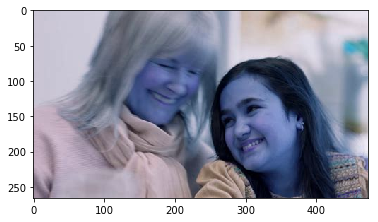

In [114]:

for i in range (len(images)):
    print(i)
    plt.imshow(images[i])

In [111]:
plt.imshow(images[0])

IndexError: list index out of range

In [ ]:
images[0]

In [76]:
len(images[0:10])
len(images[10:20])

10

In [99]:
images=[]
for i in range (3):
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    img = cv2.imread(image_path)
    images.append(img)

In [100]:
images[0].shape

(480, 640, 3)

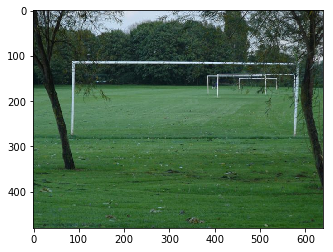

In [105]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

In [101]:
img1 = images[0]
img2 = images[1]

In [102]:
# function calling
im_tile_resize = concat_tile_resize([[img1, img2,
                                      img1, img2, img1],
                                     [img1, img2, img1]])
# show the image
#cv2.imshow('concat_tile_resize.jpg', im_tile_resize)

In [103]:
len([[img1, img2,
                                      img1, img2, img1],
                                     [img1, img2, img1]])

2

In [104]:
len([img1, img2,
                                      img1, img2, img1])

5

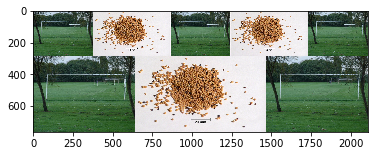

In [89]:
plt.imshow(cv2.cvtColor(im_tile_resize, cv2.COLOR_BGR2RGB))

In [33]:
df_gold.iloc[i][0]

'image.2166.jpg'

In [50]:
df_data.shape[0]

463

In [65]:

for j in range (2,df_data.shape[0]):
    for k in range(2,df_data.shape[1]):
        print(df_data.iloc[j][k], df_gold.iloc[j][0])
        if (df_data.iloc[j][k]!= df_gold.iloc[j][0]):
            print(k)
            break
    break

image.4435.jpg image.4432.jpg
image.4436.jpg image.4432.jpg
image.1166.jpg image.4432.jpg
image.4430.jpg image.4432.jpg
image.4433.jpg image.4432.jpg
image.4432.jpg image.4432.jpg
7


In [59]:
df_gold.iloc[0]

0    image.2166.jpg
Name: 0, dtype: object

In [61]:
df_data.iloc[0]

0               goal
1      football goal
2     image.4418.jpg
3     image.4416.jpg
4     image.4417.jpg
5     image.4413.jpg
6     image.4412.jpg
7     image.4415.jpg
8     image.4419.jpg
9     image.4414.jpg
10    image.2166.jpg
11    image.1150.jpg
Name: 0, dtype: object

In [9]:
i= 0
image_path = os.path.join(folder_images, df_gold.iloc[i][0])
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

NameError: name 'df_gold' is not defined

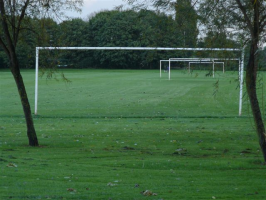

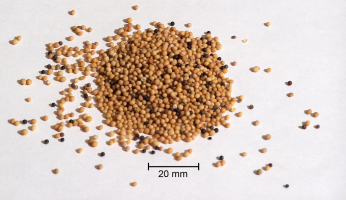

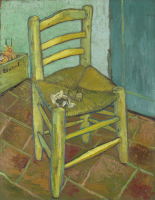

In [94]:
from IPython.display import display, Image
import PIL.Image
from io import BytesIO
import cv2

def show_image(img, fmt='png'):
    a = np.uint8(img)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
specific_height = 200
for i in range (3):
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    img = cv2.imread(image_path)
    
    scale_percent = specific_height/img.shape[0]
    height = specific_height
    width = int(img.shape[1] * scale_percent)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    show_image(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

In [90]:
width

66

In [31]:
cv2.imwrite('im_tile_resize.png', im_tile_resize)

True

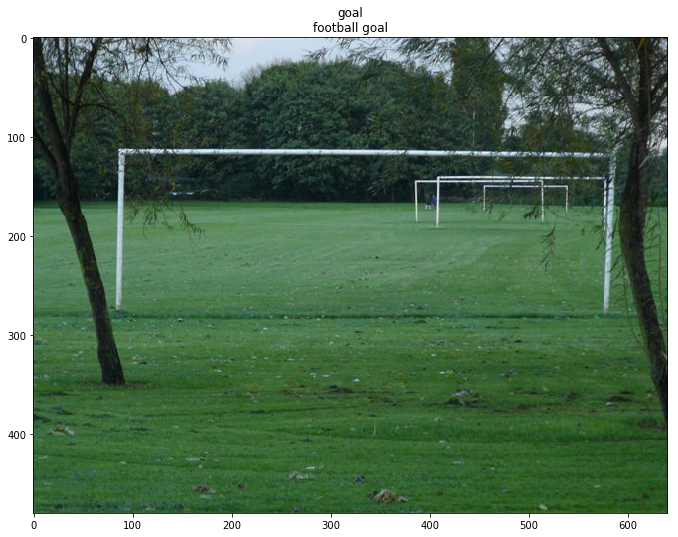

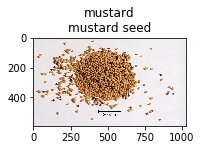

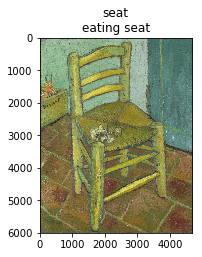

elapsed time is  2.138404369354248


In [102]:
start=time.time()

plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.ion() 

#for i in range (df_gold.shape[0]):
for i in range (3):
    image_path = os.path.join(folder_images, df_gold.iloc[i][0])
    label= df_data.iloc[i][0]
    context = df_data.iloc[i][1]
    img = cv2.imread(image_path)
    ax = plt.subplot(1, 2, 1)
    ax.set_title(label+"\n"+context)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    #ax.savefig('my_plot.png')
    fig = ax.get_figure()
    fig.savefig("output.png")
    
    ax.figure.savefig('demo-file.png')
    #time.sleep(5)
    #input('again?')
    #ax.draw()
    #ax.waitforbuttonpress()
    """# chart formatting
    ax.set_title(Label+"\n"+Context)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #for i in range (2):
    Label=dfData.values[i][0]
    Context=dfData.values[i][1]
    imageName=dfGold.values[i][0]
    txt_pathData = 'all_images/'+imageName
    # read the image
    contentImage=tar.extractfile(txt_pathData) 
    img = cv2.imdecode(np.frombuffer(contentImage.read(), np.uint8), 1)   
    ax = plt.subplot(5, 6, i+1)
    # chart formatting
    
    #ax.get_legend().remove()
#ax.set_xlabel("")"""
  
end=time.time()
elapsed= end-start
print("elapsed time is ", elapsed)

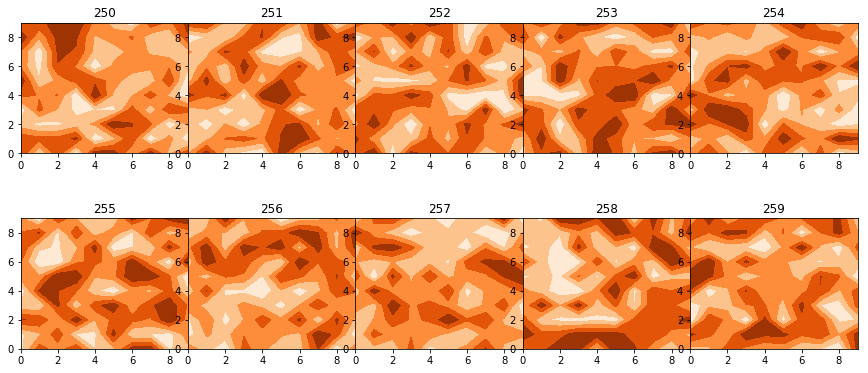

In [63]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):

    axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    axs[i].set_title(str(250+i))

In [ ]:
for i in range(5):
    print(i)
    input('again?')

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\0-dataset\\test.data.v1.1.gold\\en.test.gold.v1.1.txt'

In [ ]:
with tarfile.open(tar_fileName, "r:*") as tar:
  DataLine=8
  GoldLine=79
  txt_pathData = tar.getnames()[DataLine] 
  dfData= pd.read_csv(tar.extractfile(txt_pathData), header=None, sep="\t")
  txt_pathGold = tar.getnames()[GoldLine]
  dfGold = pd.read_csv(tar.extractfile(txt_pathGold), header=None, sep="\t")
  print("number of files in the folder ", tar_fileName, "is ", len(tar.getnames()),'\n')
  print("content of file ",txt_pathData,'\n', dfData,'\n')
  print("content of file ",txt_pathGold,'\n', dfGold)